# Qiskit v2.0 — Ep. 1: Python Environment Setup

## 1) Create a clean Python environment

Run this in your **project directory** (Terminal / PowerShell).  
> You don't run this from inside Jupyter.


In [ ]:
# bash / powershell (run OUTSIDE the notebook)
# Create a virtual environment named .venv
python -m venv .venv

## 2) Activate your environment

In [ ]:
# PowerShell
.venv\Scripts\Activate.ps1

# CMD
.venv\Scripts\activate

# macOS / Linux
source .venv/bin/activate

## 3) Install Qiskit SDK

In [ ]:
# With the venv activated, install the SDK
%pip install qiskit

# Optional: IBM Qiskit Runtime (access to IBM QPUs via IBM Cloud)
%pip install qiskit-ibm-runtime

## 4) (Optional) Install visualization extras

In [ ]:
# Enables circuit drawings and plots
pip install 'qiskit[visualization]'

## 5) Quick sanity check (you can run this cell)

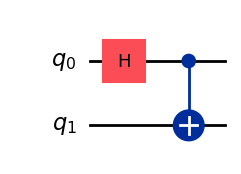

Statevector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [ ]:
# This cell can be run inside Jupyter after Qiskit is installed in your venv.
# It builds a simple Bell circuit and simulates it.

try:
    from qiskit import QuantumCircuit
    from qiskit.quantum_info import Statevector
    from qiskit_aer import Aer
    from qiskit.visualization import circuit_drawer
    AER_AVAILABLE = True
except Exception as e:
    AER_AVAILABLE = False
    print("Qiskit or qiskit-aer not installed in this kernel/environment.")
    print("Activate your .venv and install: pip install qiskit qiskit-aer")
    raise e

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

display(qc.draw(output='mpl'))

if AER_AVAILABLE:
    backend = Aer.get_backend('aer_simulator')
    qc2 = qc.copy()
    qc2.save_statevector()
    result = backend.run(qc2).result()
    sv = result.get_statevector()
    print("Statevector:", sv)


## 7) (Optional) IBM Quantum Runtime quickstart

If you want to run on real IBM QPUs later, you'll need an IBM Cloud account and an API key.
You will need a minimum version >=3.10 to ensure compatibility with all the latest Qiskit features.

In [3]:
from platform import python_version

print(python_version())

3.11.13


Finally, you can run the following code to set up your IBM Cloud account. You'll need to obtain the API Token you generated on the IBM Quantum Platform and CERN after creating an instance.

If you're stuck, you can use this tutorial! [IBM Cloud account](https://quantum.cloud.ibm.com/docs/en/guides/cloud-setup).

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token="your_api_key",
    instance="your_crn",
    name="assign_a_name_here",
    overwrite=True
)

In [ ]:
# Check that the account has been saved properly
service = QiskitRuntimeService(name="your_name_assigned_above")
service.saved_accounts()

## You got it!